In [65]:
import pandas as pd
import seaborn as sns
import numpy as np

In [66]:
dados = pd.read_csv('vendas_supermercado.csv')
dados.head()

,cidade,tipo_cliente,genero,tipo_produto,preco,quantidade,taxa_5%,total,dia,hora,forma_pagamento,margem_lucro,renda_bruta,avaliacao
0,Yangon,Member,Feminino,Saúde e Beleza,74.69,7,26.1415,548.9715,1/5/2019,13:08,Carteira Digital,4.761905,26.1415,9.1
1,Naypyitaw,Normal,Feminino,Eletrônicos,15.28,5,3.8200,80.2200,3/8/2019,10:29,Dinheiro,4.761905,3.8200,9.6
2,Yangon,Normal,Masculino,Casa,46.33,7,16.2155,340.5255,3/3/2019,13:23,Cartão de Crédito,4.761905,16.2155,7.4
3,Yangon,Member,Masculino,Saúde e Beleza,58.22,8,23.2880,489.0480,1/27/2019,20:33,Carteira Digital,4.761905,23.2880,8.4
4,Yangon,Normal,Masculino,Esportes,86.31,7,30.2085,634.3785,2/8/2019,10:37,Carteira Digital,4.761905,30.2085,5.3


In [67]:
dados.dtypes

cidade              object
tipo_cliente        object
genero              object
tipo_produto        object
preco              float64
quantidade           int64
taxa_5%            float64
total              float64
dia                 object
hora                object
forma_pagamento     object
margem_lucro       float64
renda_bruta        float64
avaliacao          float64
dtype: object

In [68]:
print('Essa tabela possui {} valores nulos'.format(dados.isna().sum().sum()))

Essa tabela possui 0 valores nulos


In [69]:
dados.describe().round(2)

,preco,quantidade,taxa_5%,total,margem_lucro,renda_bruta,avaliacao
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,4.76,49.65,10.00


In [70]:
dados.head()

,cidade,tipo_cliente,genero,tipo_produto,preco,quantidade,taxa_5%,total,dia,hora,forma_pagamento,margem_lucro,renda_bruta,avaliacao
0,Yangon,Member,Feminino,Saúde e Beleza,74.69,7,26.1415,548.9715,1/5/2019,13:08,Carteira Digital,4.761905,26.1415,9.1
1,Naypyitaw,Normal,Feminino,Eletrônicos,15.28,5,3.8200,80.2200,3/8/2019,10:29,Dinheiro,4.761905,3.8200,9.6
2,Yangon,Normal,Masculino,Casa,46.33,7,16.2155,340.5255,3/3/2019,13:23,Cartão de Crédito,4.761905,16.2155,7.4
3,Yangon,Member,Masculino,Saúde e Beleza,58.22,8,23.2880,489.0480,1/27/2019,20:33,Carteira Digital,4.761905,23.2880,8.4
4,Yangon,Normal,Masculino,Esportes,86.31,7,30.2085,634.3785,2/8/2019,10:37,Carteira Digital,4.761905,30.2085,5.3


In [71]:
freuqencia = pd.crosstab(dados.genero, dados.forma_pagamento)
freuqencia

forma_pagamento,Carteira Digital,Cartão de Crédito,Dinheiro
genero,,,
Feminino,160,163,178
Masculino,185,148,166


#### Os gastos são bem distribuidos entre os tipos de pagamentos

# Média de Gastos por gênero e forma de pagamento

In [72]:
media_gastos = pd.crosstab(dados.genero, dados.forma_pagamento, aggfunc= 'mean', values = dados.total)
media_gastos.round(2)

forma_pagamento,Carteira Digital,Cartão de Crédito,Dinheiro
genero,,,
Feminino,342.94,328.21,334.35
Masculino,297.96,319.38,317.42


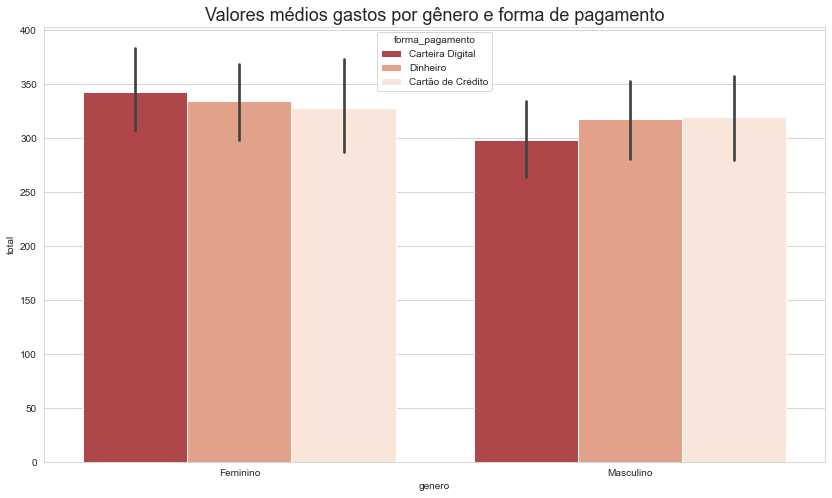

In [73]:
sns.set_style('whitegrid')
sns.set_palette('RdGy')
ax= sns.barplot(x= dados.genero, y= dados.total, hue= dados.forma_pagamento, data= dados)
ax.figure.set_size_inches(14, 8)
ax.set_title('Valores médios gastos por gênero e forma de pagamento', fontsize = 18)
ax= ax

#### Os valores médios gastos por gênero e por forma de pagamento não tem diferença significativa

# Distribuição dos gastos

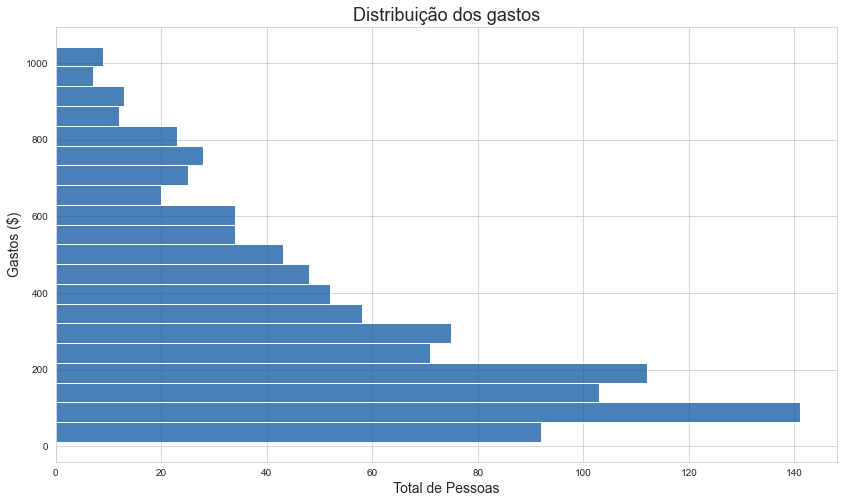

In [74]:
sns.set_palette("Blues_r")
ax= sns.histplot(y= dados.total, data = dados, bins= 20)
ax.figure.set_size_inches(14, 8)
ax.set_title('Distribuição dos gastos', fontsize = 18)
ax.set_ylabel('Gastos ($)', fontsize = 14)
ax.set_xlabel('Total de Pessoas', fontsize = 14)
ax = ax


#### A maioria das pessoas gastam em média de 100 a 200 dolares por compra

# Distribuição dos gastos por Tipo de Produto

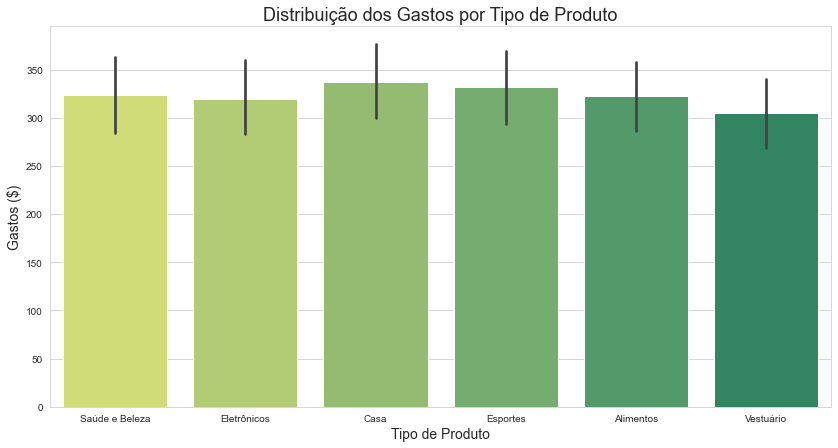

In [88]:
sns.set_palette('summer_r')
ax = sns.barplot(x = 'tipo_produto', y = 'total', data = dados)
ax.figure.set_size_inches(14, 7)
ax.set_title("Distribuição dos Gastos por Tipo de Produto", fontsize = 18)
ax.set_ylabel('Gastos ($)', fontsize = 14)
ax.set_xlabel('Tipo de Produto', fontsize = 14)
ax= ax

#### O gasto médio por produto é similiar em todas as categorias, sendo os do tipo casa e esporte os que tem o maior gasto médio

# Distribuição da Renda por Forma de Pagamento

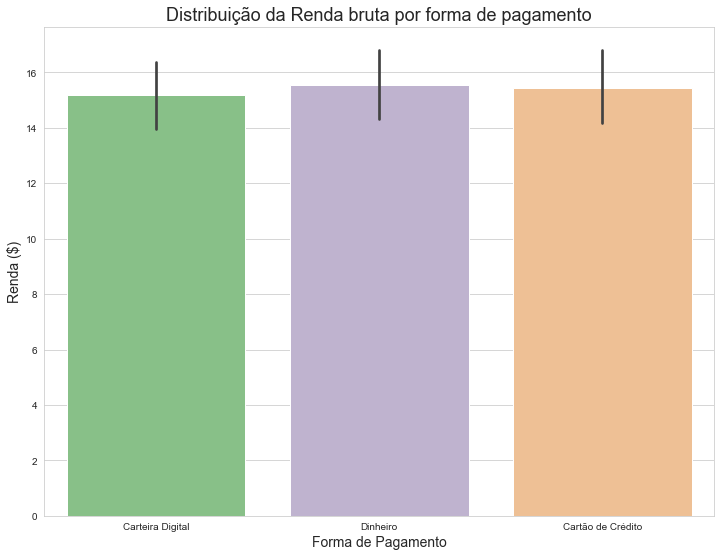

In [99]:
sns.set_palette('Accent')
ax = sns.barplot(x = 'forma_pagamento', y = 'renda_bruta', data = dados)
ax.figure.set_size_inches(12, 9)
ax.set_title("Distribuição da Renda bruta por forma de pagamento", fontsize = 18)
ax.set_ylabel('Renda ($)', fontsize = 14)
ax.set_xlabel('Forma de Pagamento', fontsize = 14)
ax= ax

# Distribuição de Renda por Tipo de Produto

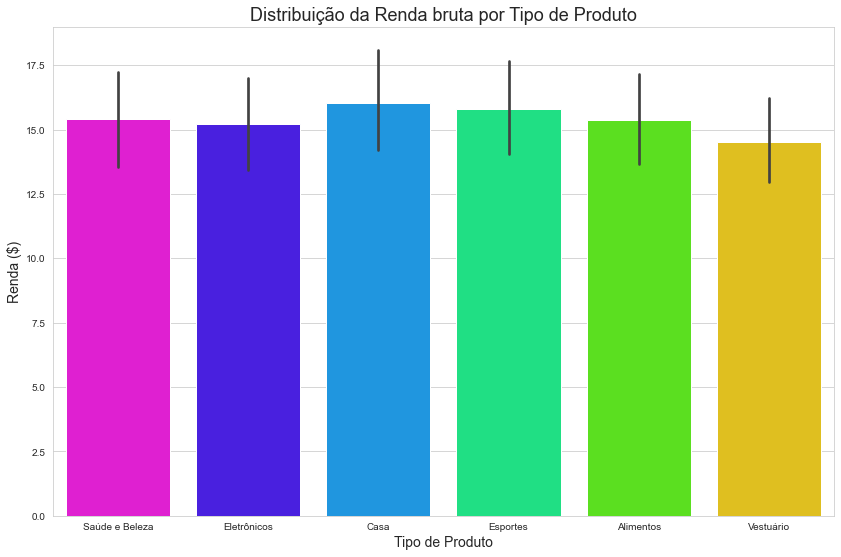

In [109]:
sns.set_palette('hsv_r')
ax = sns.barplot(x = 'tipo_produto', y = 'renda_bruta', data = dados)
ax.figure.set_size_inches(14, 9)
ax.set_title("Distribuição da Renda bruta por Tipo de Produto", fontsize = 18)
ax.set_ylabel('Renda ($)', fontsize = 14)
ax.set_xlabel('Tipo de Produto', fontsize = 14)
ax= ax

#### A renda bruta é maior nos segmentos de casa e esportes

# Distribuição de Gastos de Membros e não Membros

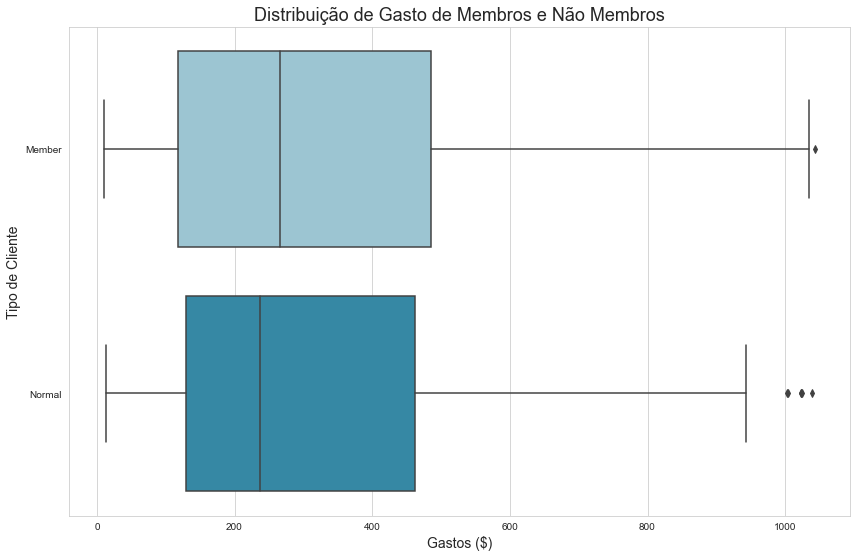

In [116]:
sns.set_palette('ocean_r')
ax= sns.boxplot(x= 'total', y = 'tipo_cliente', data = dados)
ax.figure.set_size_inches(14, 9)
ax.set_title("Distribuição de Gasto de Membros e Não Membros", fontsize = 18)
ax.set_ylabel('Tipo de Cliente', fontsize = 14)
ax.set_xlabel('Gastos ($)', fontsize = 14)
ax= ax

In [117]:
media_gastos_fil = pd.crosstab(dados.tipo_cliente, dados.forma_pagamento, aggfunc= 'mean', values = dados.total)
media_gastos_fil.round(2)

forma_pagamento,Carteira Digital,Cartão de Crédito,Dinheiro
tipo_cliente,,,
Member,321.68,335.88,325.36
Normal,316.32,309.32,326.96


#### Os membros Gastam em média um pouco mais do que os clientes normais principalmente no cartão de crédito